In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Caso der erro nesta célula é necessário instalar o plotly.
import plotly.graph_objs as go
import plotly.plotly as py

In [3]:
plt.rcParams["figure.figsize"] = (12,8)
sns.set()
list_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

In [4]:
suicide_csv = "../csvs/suicide.csv"
hdi_csv = "../csvs/hdi.csv"
country_continent_csv = "../csvs/countryContinent.csv"
total_population_csv = "../csvs/totalPopulationCountries.csv"
total_populationF_csv = "../csvs/totalPopulationF.csv"
total_populationM_csv = "../csvs/totalPopulationM.csv"
users_internet_csv = "../csvs/totalUsersInternet.csv"
gender_inequality_csv = "../csvs/genderInequality.csv"
employmentto_population_csv = "../csvs/employmenttoPopulationRatio(%ages15andOlder).csv"
positive_negative_csv = "../csvs/positiveNegativeData.csv"
climate_russia_csv = "../csvs/climateRussia.csv"
climate_sweden_csv = "../csvs/climateSweden.csv"

In [5]:
#Lendo csv.
suicide_df = pd.read_csv(suicide_csv, sep=";")
hdi_df = pd.read_csv(hdi_csv, sep=";")
country_continent_df = pd.read_csv(country_continent_csv)
total_population_df = pd.read_csv(total_population_csv)
total_populationF_df = pd.read_csv(total_populationF_csv, sep=";")
total_populationM_df = pd.read_csv(total_populationM_csv, sep=";")
users_internet_df = pd.read_csv(users_internet_csv, sep=";")
gender_inequality_df = pd.read_csv(gender_inequality_csv)
employmentto_population_df = pd.read_csv(employmentto_population_csv)
positive_negative_df = pd.read_csv(positive_negative_csv, sep=";")
climate_russia_df = pd.read_csv(climate_russia_csv)
climate_sweden_df = pd.read_csv(climate_sweden_csv)

In [6]:
#Fazendo cópias do Dataframe para trabalhar com as cópias.
suicide = suicide_df.copy()
hdi = hdi_df.copy()
country_continent = country_continent_df.copy()
total_population = total_population_df.copy()
total_populationF = total_populationF_df.copy()
total_populationM = total_populationM_df.copy()
users_internet = users_internet_df.copy()
gender_inequality = gender_inequality_df.copy()
employmentto_population = employmentto_population_df.copy()
positive_negative = positive_negative_df.copy()
climate_russia = climate_russia_df.copy()
climate_sweden = climate_sweden_df.copy()

In [7]:
#Fazendo drop em colunas que não serão ultilizadas.
country_continent.drop("code_2", axis=1, inplace=True)
country_continent.drop("code_3", axis=1, inplace=True)
country_continent.drop("country_code", axis=1, inplace=True)
country_continent.drop("iso_3166_2", axis=1, inplace=True)
country_continent.drop("region_code", axis=1, inplace=True)
country_continent.drop("sub_region_code", axis=1, inplace=True)
'''
positive_negative.drop("Life Ladder", axis=1, inplace=True)
positive_negative.drop("Log GDP per capita", axis=1, inplace=True)
positive_negative.drop("Social support", axis=1, inplace=True)
positive_negative.drop("Healthy life expectancy at birth", axis=1, inplace=True)
positive_negative.drop("Freedom to make life choices", axis=1, inplace=True)
positive_negative.drop("Generosity", axis=1, inplace=True)
positive_negative.drop("Perceptions of corruption", axis=1, inplace=True)
positive_negative.drop("Confidence in national government", axis=1, inplace=True)
positive_negative.drop("Democratic Quality", axis=1, inplace=True)
positive_negative.drop("Delivery Quality", axis=1, inplace=True)
positive_negative.drop("Standard deviation of ladder by country-year", axis=1, inplace=True)
positive_negative.drop("Standard deviation/Mean of ladder by country-year", axis=1, inplace=True)
positive_negative.drop("GINI index (World Bank estimate)", axis=1, inplace=True)
positive_negative.drop("GINI index (World Bank estimate), average 2000-16", axis=1, inplace=True)
positive_negative.drop("gini of household income reported in Gallup, by wp5-year", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, Gallup", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1981-1984", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1989-1993", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1994-1998", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1999-2004", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 2005-2009", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 2010-2014", axis=1, inplace=True)
climate_russia.drop("ISO3", axis=1, inplace=True)
climate_sweden.drop("ISO3", axis=1, inplace=True)
'''

'\npositive_negative.drop("Life Ladder", axis=1, inplace=True)\npositive_negative.drop("Log GDP per capita", axis=1, inplace=True)\npositive_negative.drop("Social support", axis=1, inplace=True)\npositive_negative.drop("Healthy life expectancy at birth", axis=1, inplace=True)\npositive_negative.drop("Freedom to make life choices", axis=1, inplace=True)\npositive_negative.drop("Generosity", axis=1, inplace=True)\npositive_negative.drop("Perceptions of corruption", axis=1, inplace=True)\npositive_negative.drop("Confidence in national government", axis=1, inplace=True)\npositive_negative.drop("Democratic Quality", axis=1, inplace=True)\npositive_negative.drop("Delivery Quality", axis=1, inplace=True)\npositive_negative.drop("Standard deviation of ladder by country-year", axis=1, inplace=True)\npositive_negative.drop("Standard deviation/Mean of ladder by country-year", axis=1, inplace=True)\npositive_negative.drop("GINI index (World Bank estimate)", axis=1, inplace=True)\npositive_negative

In [8]:
#Junatando suicidio com continentes, para obter os nomes dos continentes e sub-regiões.
add_continent = pd.merge(suicide,country_continent,on=["country"], how="inner")

#Juntando continentes(gerado no merge anterior) com o idh, para obter a coluna de idh.
add_hdi = pd.merge(add_continent,hdi, on=["country","year"], how="inner")

#Adicionando a coluna de população total.
add_total_population = pd.merge(add_hdi,total_population, on=["country","year"], how="inner")

#Adicionando a coluna de população total Feminina.
add_total_populationF = pd.merge(add_total_population, total_populationF,on=["country","year"], how="inner")

#Adicionando a coluna de população total Masculina.
add_total_populationM = pd.merge(add_total_populationF, total_populationM,on=["country","year"], how="inner")

#Adicionando a coluna de total de usuários de internet.
add_users_internet = pd.merge(add_total_populationM, users_internet,on=["country","year"], how="inner")

#Adicionando a coluna de desigualdade de gênero.
add_gender_inequality = pd.merge(add_users_internet, gender_inequality,on=["country","year"], how="inner")

#Adicionando a coluna de taxa de empregados a partir de 15 anos.
add_employmentto_population = pd.merge(add_gender_inequality,employmentto_population,on=["country","year"], how="inner")

#Adicionando a coluna de afeto positivo e afeto negativo.
result = pd.merge(add_employmentto_population, positive_negative,on=["country","year"], how="inner")

In [9]:
#America
mexico= result[(result["country"] == "Mexico") & (result["year"] > 2005)]
brazil= result[(result["country"] == "Brazil") & (result["year"] > 2005)]
unitedStates= result[(result["country"] == "United States")]
argentina= result[(result["country"] == "Argentina")]

#Asia, africa e oceania 
japan = result[(result["country"] == "Japan") & (result["year"] > 2005)]
australia = result[(result["country"] == "Australia")]
southAfrica = result[(result["country"] == "South Africa")]
israel = result[(result["country"] == "Israel")]

#Europa
sweden = result[(result["country"] == "Sweden") & (result["year"] > 2005)]
poland = result[(result["country"] == "Poland") & (result["year"] > 2005)]
netherlands = result[(result["country"] == "Netherlands") & (result["year"] > 2005)]
germany = result[(result["country"] == "Germany ") & (result["year"] > 2005)]
unitedKingdom = result[(result["country"] == "United Kingdom") & (result["year"] > 2005)]
italy = result[(result["country"] == "Italy") & (result["year"] > 2005)]
spain = result[(result["country"] == "Spain")]
russia = result[(result["country"] == "Russian Federation")]


In [10]:
#Criação de frames por Continente

frames = [mexico, brazil, argentina, unitedStates]
america = pd.concat(frames, keys=['x', 'y', 'z'])


frames = [japan, israel, australia, southAfrica]
asiaAfricaOceania= pd.concat(frames, keys=['x', 'y', 'z'])


frames = [sweden, poland, netherlands, unitedKingdom, italy, germany, spain, russia]
europa = pd.concat(frames, keys=['x', 'y', 'z'])



In [11]:
#America
mexico_male = mexico[(mexico["sex"] == "male")]
mexico_female = mexico[(mexico["sex"] == "female")]

unitedStates_male = unitedStates[(unitedStates["sex"] == "male")]
unitedStates_female = unitedStates[(unitedStates["sex"] == "female")]

brazil_male = brazil[(brazil["sex"] == "male")]
brazil_female = brazil[(brazil["sex"] == "female")]

argentina_male = argentina[(argentina["sex"] == "male")]
argentina_female = argentina[(argentina["sex"] == "female")]


#Asia, africa e Oceania
japan_male = japan[(japan["sex"] == "male")]
japan_female = japan[(japan["sex"] == "female")]


israel_male = israel[(israel["sex"] == "male")]
israel_female = israel[(israel["sex"] == "female")]

southAfrica_male = southAfrica[(southAfrica["sex"] == "male")]
southAfrica_female = southAfrica[(southAfrica["sex"] == "female")]

australia_male = australia[(australia["sex"] == "male")]
australia_female = australia[(australia["sex"] == "female")]

#Europa

netherlands_male = netherlands[(netherlands["sex"] == "male")]
netherlands_female = netherlands[(netherlands["sex"] == "female")]


unitedKingdom_male = unitedKingdom[(unitedKingdom["sex"] == "male")]
unitedKingdom_female = unitedKingdom[(unitedKingdom["sex"] == "female")]


spain_male = spain[(spain["sex"] == "male")]
spain_female = spain[(spain["sex"] == "female")]
 
    
italy_male = italy[(italy["sex"] == "male")]
italy_female = italy[(italy["sex"] == "female")]

germany_male = germany[(germany["sex"] == "male")]
germany_female = germany[(germany["sex"] == "female")]

poland_male = poland[(poland["sex"] == "male")]
poland_female = poland[(poland["sex"] == "female")]


russia_male = russia[(russia["sex"] == "male")]
russia_female = russia[(russia["sex"] == "female")]


sweden_male = sweden[(sweden["sex"] == "male")]
sweden_female = sweden[(sweden["sex"] == "female")]



In [12]:
#Frames separados por região


america_male = america[(america["sex"] == "male")]
america_female = america[(america["sex"] == "female")]

asiaAfricaOceania_male = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "male")]
asiaAfricaOceania_female = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "female")]

europa_male = europa[(europa["sex"] == "male")]
europa_female = europa[(europa["sex"] == "female")]

In [13]:
#America
gbr = brazil.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gar = argentina.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gme = mexico.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gus = unitedStates.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()

#Asia, africa e Oceania
gjp = japan.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gsa = southAfrica.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gis = israel.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gau = australia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()

#Europa
gru = russia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gsw = sweden.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gpo = poland.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gge = germany.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
git = italy.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gsp = spain.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
guk = unitedKingdom.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gne = netherlands.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()



In [14]:
gamerica = america.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gaao = asiaAfricaOceania.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
geuro = europa.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()

In [15]:
gru.head()

,year,country,sex,totalPopulationFemale,totalPopulationMale,suicides_no,population,suicides/100kpop,gdp-year,gdp-per-capita,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,2010,Russian Federation,female,76601805.0,66247644.0,5795,72924753,50.09,9149496672474,67842,...,2.370,2.385,2.089909,0.0,0.0,2.083631,1.394118,0.0,1.485896,1.687717
1,2010,Russian Federation,male,76601805.0,66247644.0,27561,61941234,269.12,9149496672474,67842,...,2.370,2.385,2.089909,0.0,0.0,2.083631,1.394118,0.0,1.485896,1.687717
2,2011,Russian Federation,female,76657531.0,66303337.0,5568,72844705,49.30,12309970392360,91356,...,2.382,2.385,2.076387,0.0,0.0,2.083631,1.394118,0.0,1.485896,1.687717
3,2011,Russian Federation,male,76657531.0,66303337.0,25470,61901169,250.38,12309970392360,91356,...,2.382,2.385,2.076387,0.0,0.0,2.083631,1.394118,0.0,1.485896,1.687717
4,2012,Russian Federation,female,76764455.0,66437221.0,5454,72781138,47.56,13261541861670,98478,...,2.442,2.385,2.260140,0.0,0.0,2.083631,1.394118,0.0,1.485896,1.687717


In [16]:
myGroup = pd.merge(russia,sweden, how="outer")
myGroup = myGroup.groupby(["year","country","totalPopulation", "hdi","gdp-year","genderInequality","totalUsersInternet","rateEmployment15andOlder","positiveAffect",
                           "negativeAffect"], as_index=False).sum()
myGroup.head()

,year,country,totalPopulation,hdi,gdp-year,genderInequality,totalUsersInternet,rateEmployment15andOlder,positiveAffect,negativeAffect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,2010,Russian Federation,142849449.0,0.780,1524916112079,311.0,43.0,58.4,0.588975,0.171421,...,4.740,4.770000,4.179817,0.000000,0.000000,4.167262,2.788235,0.000000,2.971792,3.375433
1,2010,Sweden,9378126.0,0.905,488377689565,48.0,90.0,57.7,0.833033,0.200112,...,3.324,3.289846,3.714031,6.736626,6.849476,0.000000,6.790882,7.646214,8.156734,7.293927
2,2011,Russian Federation,142960868.0,0.789,2051661732060,305.0,49.0,59.3,0.601348,0.165235,...,4.764,4.770000,4.152774,0.000000,0.000000,4.167262,2.788235,0.000000,2.971792,3.375433
3,2011,Sweden,9449213.0,0.906,563109663291,47.0,92.8,58.4,0.814561,0.179152,...,3.312,3.289846,5.044875,0.000000,6.849476,0.000000,6.790882,7.646214,8.156734,7.293927
4,2012,Russian Federation,143201676.0,0.798,2210256976945,294.0,63.8,60.0,0.611164,0.173604,...,4.884,4.770000,4.520281,0.000000,0.000000,4.167262,2.788235,0.000000,2.971792,3.375433


In [17]:
#Pegando os países por suas sub-regiões.
australia_newzeland = result[(result["sub_region"] == "Australia and New Zealand")]
caribbean = result[(result["sub_region"] == "Caribbean")]
central_america = result[(result["sub_region"] == "Central America")]
central_asia = result[(result["sub_region"] == "Central Asia")]
eastern_africa = result[(result["sub_region"] == "Eastern Africa")]
eastern_asia = result[(result["sub_region"] == "Eastern Asia")]
eastern_europe = result[(result["sub_region"] == "Eastern Europe")]
melanesia = result[(result["sub_region"] == "Melanesia")]
micronesia = result[(result["sub_region"] == "Micronesia")]
northern_america = result[(result["sub_region"] == "Northern America")]
northern_europe = result[(result["sub_region"] == "Northern Europe")]
south_america = result[(result["sub_region"] == "South America")]
south_eastern_asia = result[(result["sub_region"] == "South-Eastern Asia")]
southern_africa = result[(result["sub_region"] == "Southern Africa")]
southern_asia = result[(result["sub_region"] == "Southern Asia")]
southern_europe = result[(result["sub_region"] == "Southern Europe")]
western_africa = result[(result["sub_region"] == "Western Africa")]
western_asia = result[(result["sub_region"] == "Western Asia")]
western_europe = result[(result["sub_region"] == "Western Europe")]

In [18]:
#Pegando os países por continentes
africa = result[(result["continent"] == "Africa")]
americas = result[(result["continent"] == "Americas")]
asia = result[(result["continent"] == "Asia")]
europe = result[(result["continent"] == "Europe")]
Oceania = result[(result["continent"] == "Oceania")]

In [19]:
def axis_x_center(length=1):
    start = -(length//2) if length%2 == 0 else -((length//2))
    end = (length//2) if length%2 == 0 else ((length//2)+1)
    
    return [x for x in range(start, end)]

In [20]:
#Função para gerar gráfico de taxa de suicídio por gênero.
# Os comentários abaixo podem ser aplicados paras as demais funções semelhantes.
def generate_chart_suicide_gen(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#d62728","#2ca02c"]
    
    plt.ylabel(axis_y) # label do eixo y
    plt.xlabel(axis_x) # label do eixo x
    plt.title(title) # titulo do gráfico
    ax = plt.subplot() # Necessário para plotar o tipo de gráfico que será utilizado.
    
    country_sex = list(df["sex"].unique())  # Pega os valores unicos da coluna do df.
    year_df = list(df["year"].unique())  # Pega os valores unicos da coluna do df.
    country_year = np.asarray(year_df) # Converte em um array do numpy.
    
    list_num = axis_x_center(len(country_sex))  # Centraliza os labels dos paises. - # Centraliza os labels do eixo x.
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))  # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #  #seta os labels do eixo x
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationFemale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        elif country_sex[index] == "male":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationMale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        # Parâmetros da linha anterior: label eixo x (ex: anos), (eixo y), largura, alinhamento, as barras, lista de cores.
        ax.legend(loc="upper right") # legendas do grafico.


    plt.show()

In [21]:
#Função para gerar gráfico de taxa de suicídio por idade.
def generate_chart_suicide_age(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#7f7f7f","#9467bd","#8c564b","#e377c2","#bcbd22","#17becf"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) # Centraliza os labels do eixo x
    plt.xlim(country_year[0]+(wd*(list_num[0]-1)), country_year[-1]+(wd*(list_num[-1]+3))) # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #seta os labels do eixo x
    
    for index in range(len(country_age)):
        country_list = list(df["suicides/100kpop"][df["age"] == country_age[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
       # label eixo x (ex: anos), (eixo y), largura, alinhamento, las barras, lista de cores.
        ax.legend(loc="upper right") # legendas do grafico.
    plt.show()

In [22]:
#Função para gerar gráfico de taxa de suicídio total por país.
def generate_chart_suicide_total(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [23]:
#Função para gerar gráfico de taxa de idh total por país.
def generate_chart_hdi_total(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(0.6, 1)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        country_hdi = np.asarray(country_hdi)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show() 

In [24]:
#Função para gerar gráfico de Desigualdade de Gênero por país.
def generate_chart_gender_inequality(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["genderInequality"][df["country"] == country_name[index]])/1000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [25]:
#Função para gerar gráfico de taxa de usuários de internet por país.
def generate_chart_users_internet(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalUsersInternet"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [26]:
#Função para gerar gráfico de taxa de Empregados por país.
def generate_chart_employment(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(55,61)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["rateEmployment15andOlder"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [27]:
#Função para gerar gráfico do PIB por país.
def generate_chart_gdp_year(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["gdp-year"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [28]:
#Função para gerar gráfico de população total por país.
def generate_chart_total_pop(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalPopulation"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [29]:
#Função para gerar gráfico de taxa de PIB per capita por país.
def generate_chart_suicide_gdp_pc(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["gdp-year"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)  # converter uma lista num array numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [30]:
#Função para gerar gráfico de media de temperatura por país.
def generate_chart_ap(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(0.5,0.9)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["positiveAffect"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



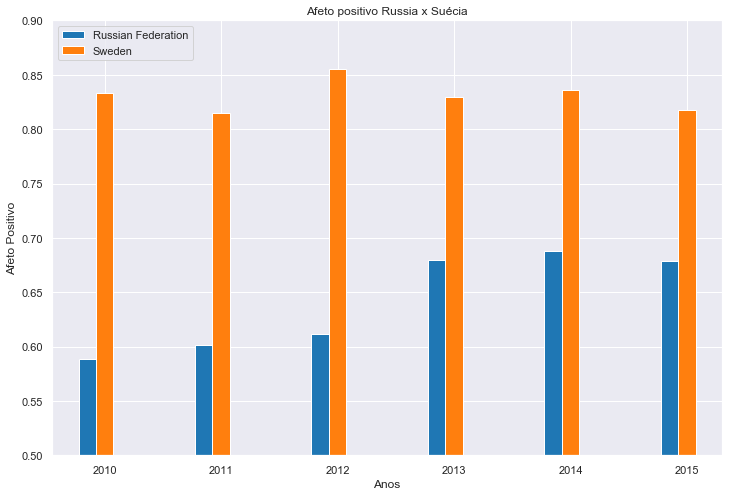

In [31]:
generate_chart_ap(myGroup, "Afeto Positivo", "Anos", "Afeto positivo Russia x Suécia")

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



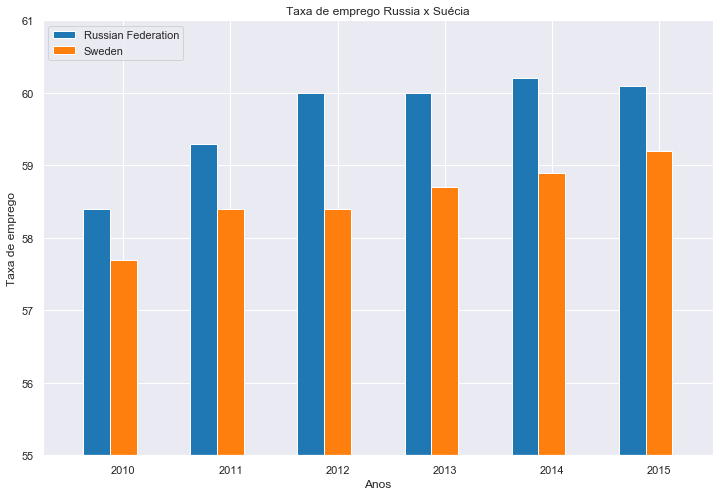

In [32]:
generate_chart_employment(myGroup, "Taxa de emprego", "Anos", "Taxa de emprego Russia x Suécia", 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



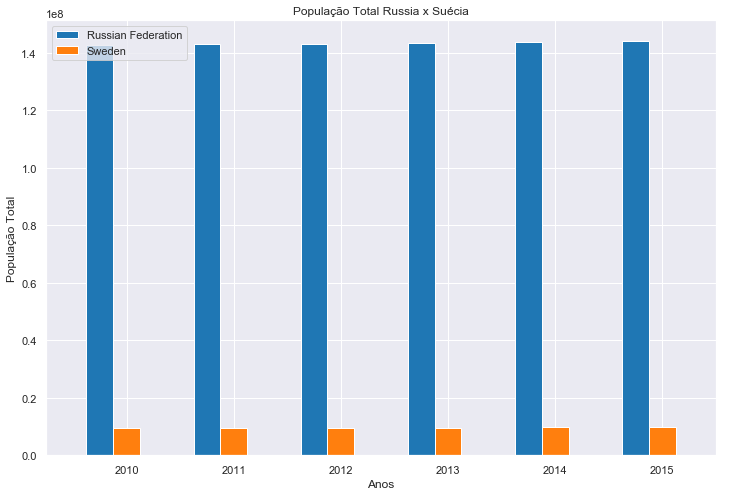

In [33]:
generate_chart_total_pop(myGroup, "População Total", "Anos", "População Total Russia x Suécia", 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



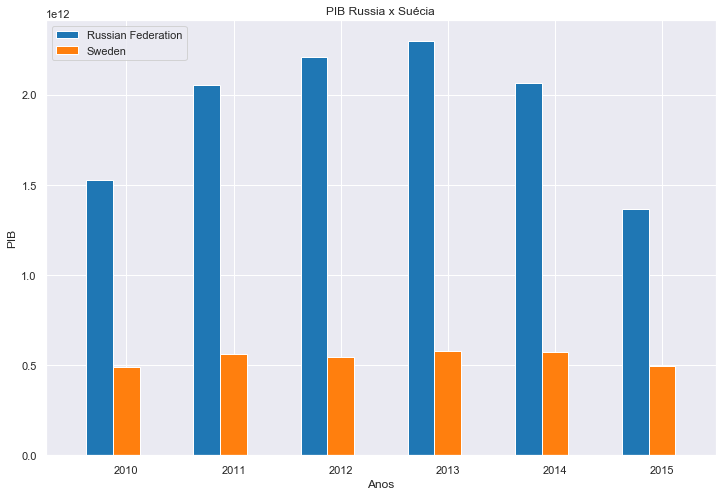

In [34]:
generate_chart_gdp_year(myGroup, "PIB", "Anos", "PIB Russia x Suécia", 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



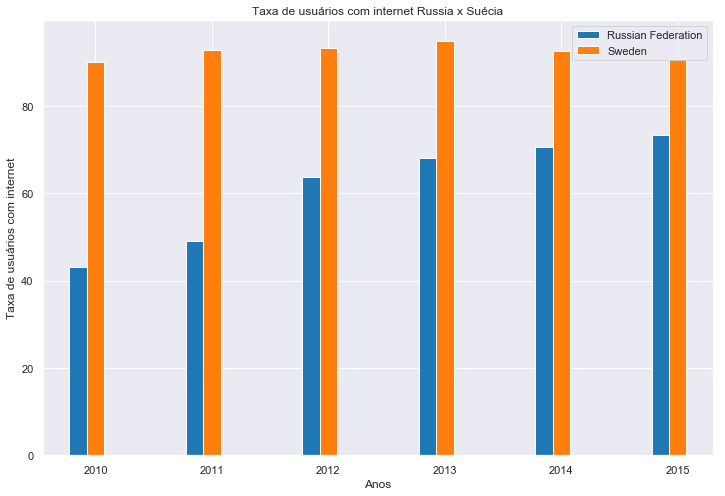

In [35]:
generate_chart_users_internet(myGroup, "Taxa de usuários com internet", "Anos", "Taxa de usuários com internet Russia x Suécia")

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



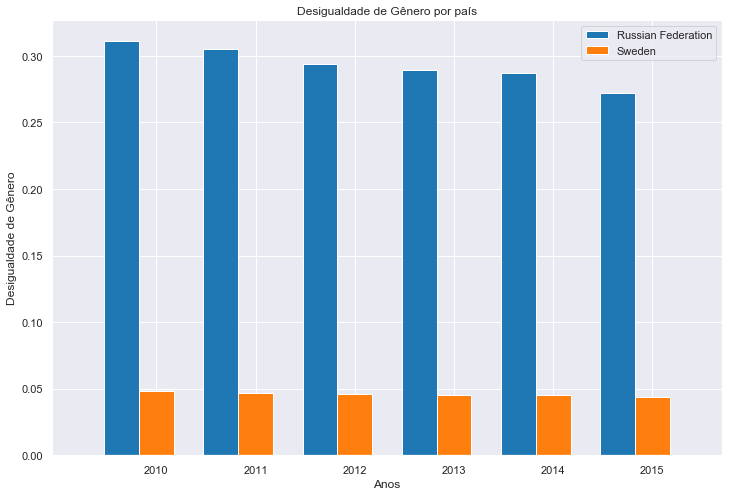

In [36]:
generate_chart_gender_inequality(myGroup, "Desigualdade de Gênero", "Anos", "Desigualdade de Gênero por país",0.35)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



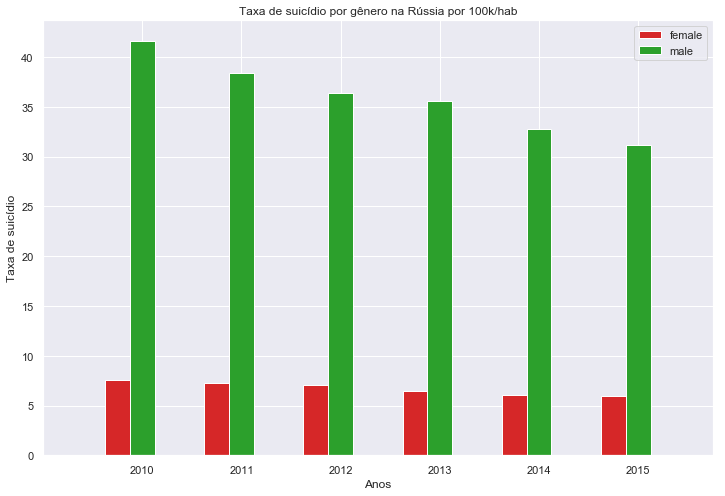

In [37]:
generate_chart_suicide_gen(gru, "Taxa de suicídio", "Anos", "Taxa de suicídio por gênero na Rússia por 100k/hab", 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



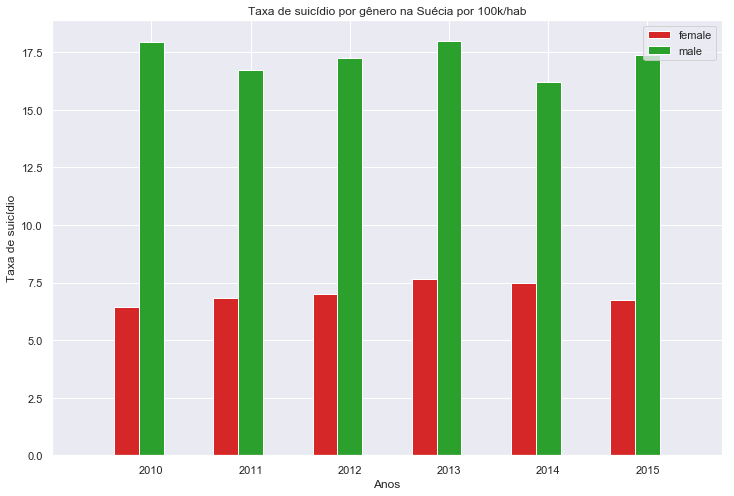

In [38]:
generate_chart_suicide_gen(gsw, "Taxa de suicídio", "Anos", "Taxa de suicídio por gênero na Suécia por 100k/hab", 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



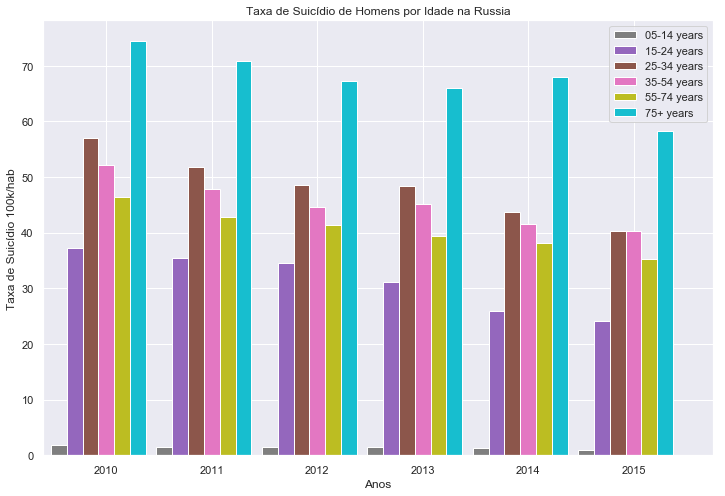

In [39]:
generate_chart_suicide_age(russia_male, "Taxa de Suicídio 100k/hab", "Anos", "Taxa de Suicídio de Homens por Idade na Russia")

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



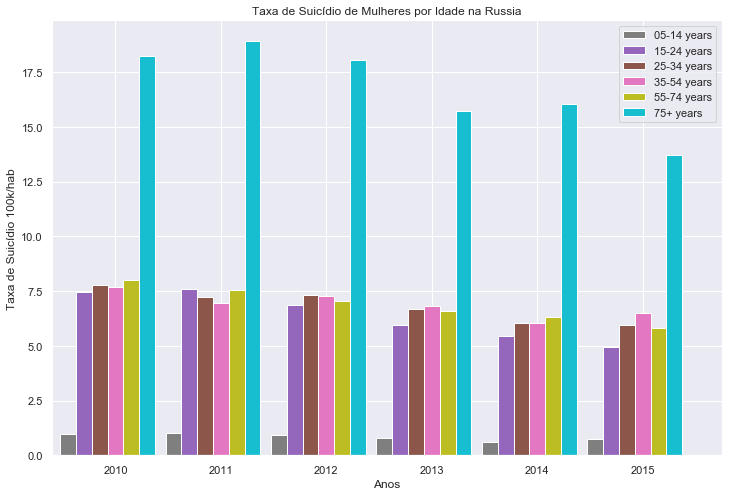

In [40]:
generate_chart_suicide_age(russia_female, "Taxa de Suicídio 100k/hab", "Anos", "Taxa de Suicídio de Mulheres por Idade na Russia")

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



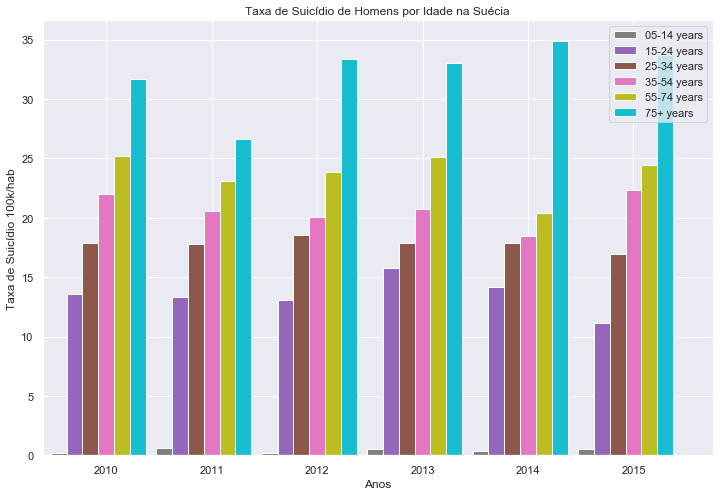

In [41]:
generate_chart_suicide_age(sweden_male, "Taxa de Suicídio 100k/hab", "Anos", "Taxa de Suicídio de Homens por Idade na Suécia")

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



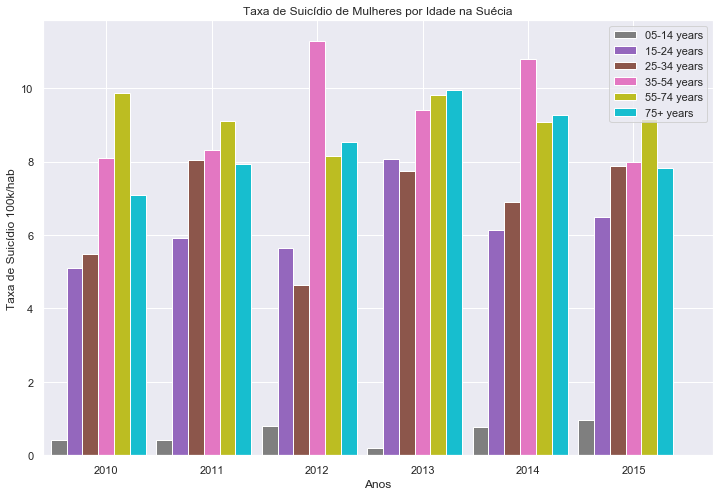

In [42]:
generate_chart_suicide_age(sweden_female, "Taxa de Suicídio 100k/hab", "Anos", "Taxa de Suicídio de Mulheres por Idade na Suécia")

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



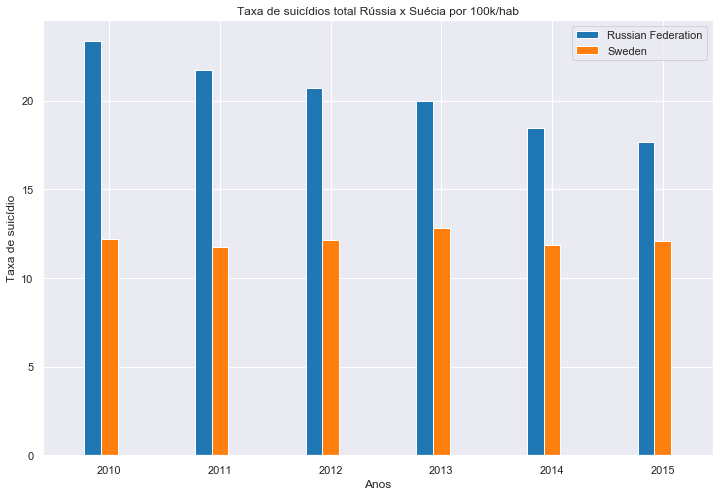

In [43]:
generate_chart_suicide_total(myGroup, 'Taxa de suicídio', 'Anos', 'Taxa de suicídios total Rússia x Suécia por 100k/hab')

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



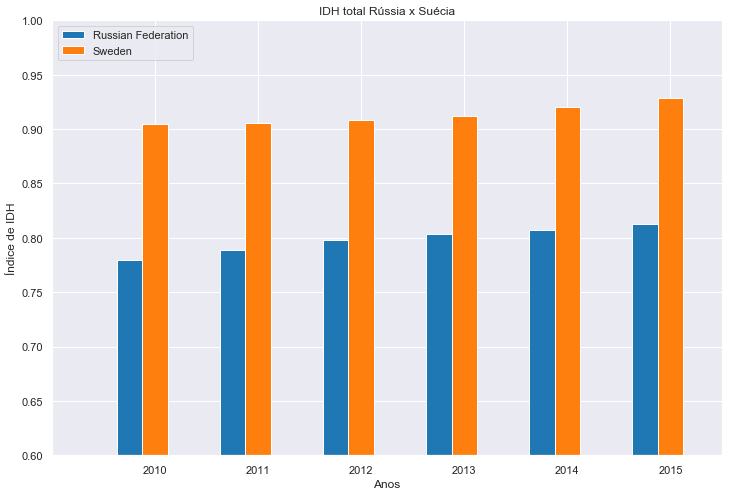

In [44]:
generate_chart_hdi_total(myGroup, "Índice de IDH", "Anos", "IDH total Rússia x Suécia", 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



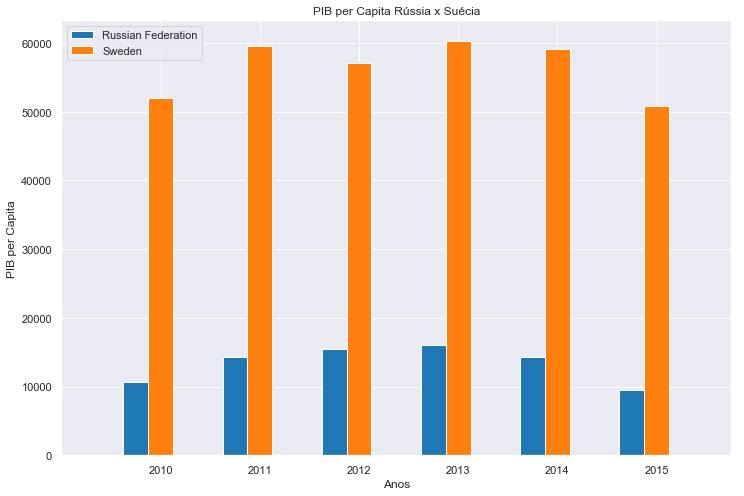

In [45]:
generate_chart_suicide_gdp_pc(myGroup,"PIB per Capita","Anos","PIB per Capita Rússia x Suécia", 0.25)

In [46]:
# Gera o dataframe especifico de cada faixa etária.
def generate_dateframe_age(df_male, df_female, age):
    #  pegando somente pela faixa etária
    df_male_age = df_male[(df_male["age"] == age)]
    df_female_age = df_female[(df_female["age"] == age)]
    
    # pegando somente as colunas que vão nos interessar
    male=pd.DataFrame(df_male_age,columns=['year','totalPopulationMale', 'population'])
    female=pd.DataFrame(df_female_age,columns=['year','totalPopulationFemale', 'population','totalPopulation'])
    
    # Criando o dataframe com os dados que vamos precisar
    pop_year_all=pd.merge(female,male,on='year') # Une os dois dataframes pela coluna 'year'.
    
    pop_year_all['population_x'] = list((pop_year_all['population_x']/pop_year_all['totalPopulationMale'])*100) # Male
    pop_year_all['population_y'] = list((pop_year_all['population_y']/pop_year_all['totalPopulationFemale'])*100) # Female
    # Sobre as duas linhas acima:
    # Observação 1: Não é preciso passar um for para realizar uma operação entre valores das colunas
    # de um mesmo dataframe. O próprio pandas identifica. Isso facilita em muito a nossa vida! :)
    # Observação 2: Como ambos os dataframes possuem a coluna 'population', o pandas cria duas novas colunas, identificando de
    # onde veio cada nova coluna. Adicionando ao final do nome da coluna um sufixo identificador. 
    # Considere o lado esquerdo do merge como 'x' e lado direito como 'y'.
    # Atenção: Esse possicionamento depende de como for passado os dataframes nos parâmetros do marge.
    
    # Renomeia as colunas.
    pop_year_all.rename(columns={'population_x':'populationFemaleTaxa','population_y':'populationMaleTaxa'}, inplace=True)
    return pop_year_all

In [47]:
# Grupo de funções para gerar posição e labels do eixo x do gráfico de faixa etária
# Diminui um dado inteiro n de 2 unidades:
func = lambda x:x-2
# Retorna o valor negativo de um número x:
negativeNum = lambda x:x*(-1)
# Função recursiva que retorna um string composta por uma série de números descrecidos de 2 unidades a partir do anterior.
def tiraDois(n):
  if n != 0:
    string = ''
    n = func(n)
    string+=str(n)+','
  if n == 2:
    n = 0
    string+=str(n)
    return string
  elif n != 0:
    string+=str(tiraDois(n))
    return string
# Gera lista de inteiros dos valores gerados na função tiraDois:
def generateListLabels(n):
  if n%2 == 0:
    n+=2
  else:
    n+=3
  lista = tiraDois(n)
  l = lista.split(',')
  l1 = list (map(int,l))
  return l1
# Retorna um número inteiro a partir de um float:
# Obs: A função nativa do python int não faz o arrendondamento ideal para nossas necessidades.
def floatToInt(n):
  try:
    n = str(n).split('.')
    if int(n[1])>5: 
      return int(n[0])+1
    else:
      return int(n[0])
  except:
    print('Por favor utilizar um valor do tipo inteiro')
# Retorna o valor maximo de uma coluna do dataframe:
def getMaxValue(df, coluna):
  n = df.loc[[df[coluna].idxmax()]]
  n = n[coluna]
  return float(n)
# Retorna o valor maximo entre dois maximos:
# Retorna o maior tamanho possivel, pois este será o limite superior dos labels do eixo x:
def returnMax(lista1, lista2):
  if max(lista1) < max(lista2):
    return lista2
  elif max(lista1) > max(lista2):
    return lista1
  elif max(lista1) == max(lista2):
    return lista2
  else:
    return 'Erro inesperado'
# Retorna nos labels do eixo X:
# Quando o parâmetro position tiver valor "True" será gerada a lista de posição dos labels do eixo x.
def getLabels(df, coluna1, coluna2, position = False):
  if position:
    lista1 = returnMax(generateListLabels(floatToInt(getMaxValue(df,coluna1 ))),
            generateListLabels(floatToInt(getMaxValue(df,coluna2 ))))
    lista2 = lista1[::-1] # reverte a lista
    lista1 = list(map(negativeNum, lista1)) # 
    lista3 = lista1 + lista2 # une as duas listas
    lista3.remove(0) # remove o zero duplicado
    return lista3
  else:
    lista1 = returnMax(generateListLabels(floatToInt(getMaxValue(df,coluna1 ))),
            generateListLabels(floatToInt(getMaxValue(df,coluna2 ))))
    lista2 = lista1[::-1] # reverte a lista
    lista3 = lista1 + lista2 # une as duas listas
    lista3.remove(0) # remove o zero duplicado
    return lista3

In [48]:
# Gera o grafico que demostra o crescimento da população de determinada faixa etária ao logo dos anos.
def generate_growth_pop_age_barh(df, col_y, col_f, col_m, x_ticks, x_labels, x_label, y_label, y_limit, title, legend ):
    fig,ax = plt.subplots()
    y_pos = df[col_y] # Recupera os labels do eixo y
    ax.barh(y_pos, df[col_f], align='center',color='red') # Define o lado esquerdo da barra.
    ax.barh(y_pos,-df[col_m],align='center',color='green') # Define o lado direito da barra.
    ax.set_yticks(y_pos) # posição dos labes y
    ax.set_xticks(x_ticks) # posição dos labels x
    ax.set_xticklabels(x_labels) # labels do eixo x
    ax.set_xlabel(x_label) # label do eixo x
    ax.set_ylabel(y_label) # label do eixo y
    plt.ylim(y_limit) # define o limite 
    ax.set_title(title,size=24) # define o titulo
    plt.legend(legend) #define as legendas
    plt.show() #plota o gráfico
    # Referência: https://mharias.com/2017/08/24/352/

In [49]:
def generate_growth_pop_age_lin(df, col_y, col_f, col_m, x_limit, x_label, y_label, legend, title):
    plt.plot(df[col_y],df[col_f], color='red' )
    plt.plot (df[col_y],df[col_m], color='green' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()
    # Referência: https://mharias.com/2017/08/24/352/

In [50]:
# Dataframes da Russia por faixa etária
russia_age_5_14 = generate_dateframe_age(russia_male, russia_female, "05-14 years")
russia_age_15_24 = generate_dateframe_age(russia_male, russia_female, "15-24 years")
russia_age_25_34 = generate_dateframe_age(russia_male, russia_female, "25-34 years")
russia_age_35_54 = generate_dateframe_age(russia_male, russia_female, "35-54 years")
russia_age_55_74 = generate_dateframe_age(russia_male, russia_female, "55-74 years")
russia_age_75 = generate_dateframe_age(russia_male, russia_female, "75+ years")

In [51]:
# Dataframes da Suecia por faixa etária
sweden_age_5_14 = generate_dateframe_age(sweden_male, sweden_female, "05-14 years")
sweden_age_15_24 = generate_dateframe_age(sweden_male, sweden_female, "15-24 years")
sweden_age_25_34 = generate_dateframe_age(sweden_male, sweden_female, "25-34 years")
sweden_age_35_54 = generate_dateframe_age(sweden_male, sweden_female, "35-54 years")
sweden_age_55_74 = generate_dateframe_age(sweden_male, sweden_female, "55-74 years")
sweden_age_75 = generate_dateframe_age(sweden_male, sweden_female, "75+ years")

In [52]:
russia_age_5_14.head()

,year,totalPopulationFemale,populationFemaleTaxa,totalPopulation,totalPopulationMale,populationMaleTaxa
0,2010,76601805.0,10.086907,142849449.0,66247644.0,9.154053
1,2011,76657531.0,10.135838,142960868.0,66303337.0,9.200345
2,2012,76764455.0,10.265018,143201676.0,66437221.0,9.326152
3,2013,76895161.0,10.477937,143506911.0,66611750.0,9.529713
4,2014,77029543.0,10.449954,143819666.0,66790123.0,9.513088


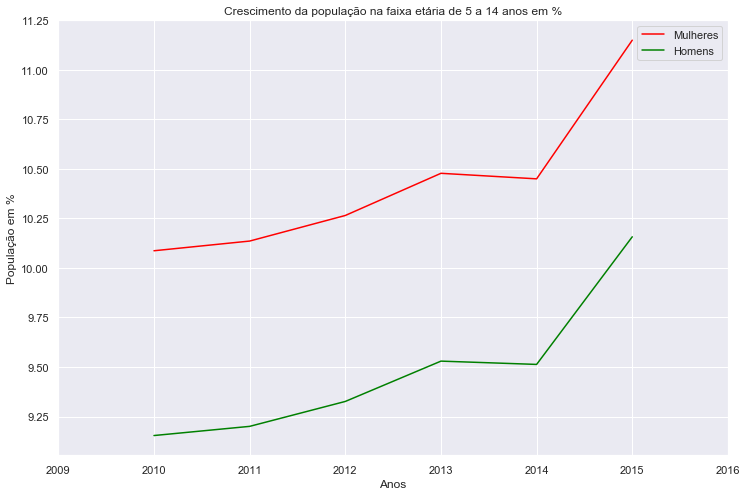

In [53]:
generate_growth_pop_age_lin(russia_age_5_14, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', [2009,2016],
                            'Anos', 'População em %', ['Mulheres','Homens'], 
                            'Crescimento da população na faixa etária de 5 a 14 anos em %')

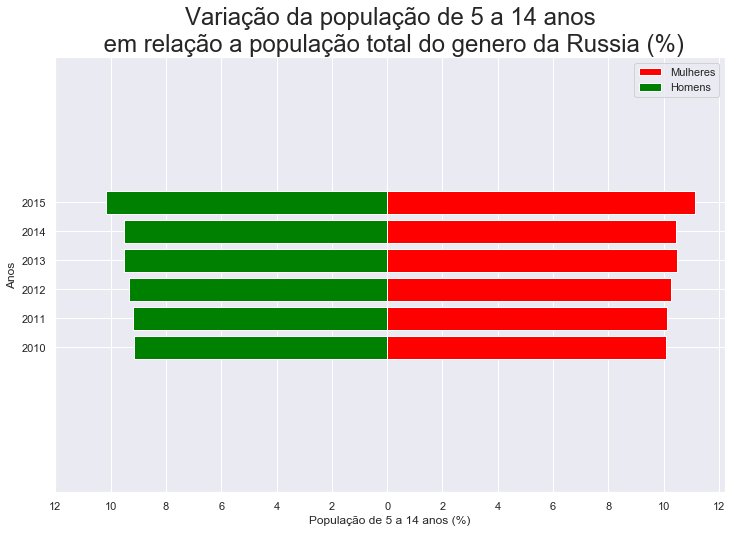

In [54]:
generate_growth_pop_age_barh(russia_age_5_14, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(russia_age_5_14,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(russia_age_5_14,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 5 a 14 anos (%)', 'Anos', [2005,2020], 'Variação da população de 5 a 14 anos\n em relação a população total do genero da Russia (%)',
                             ['Mulheres','Homens'])

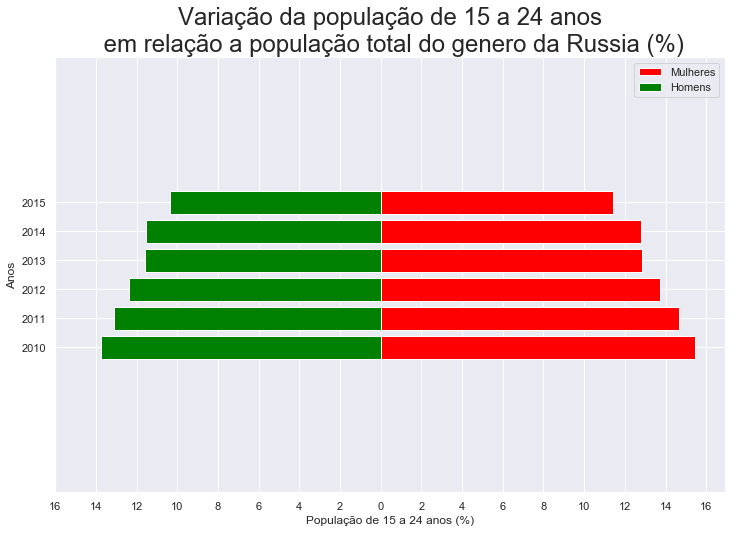

In [55]:
generate_growth_pop_age_barh(russia_age_15_24, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(russia_age_15_24,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(russia_age_15_24,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 15 a 24 anos (%)', 'Anos', [2005,2020], 'Variação da população ' +
                             'de 15 a 24 anos\n em relação a população total do genero da Russia (%)',
                             ['Mulheres','Homens'])

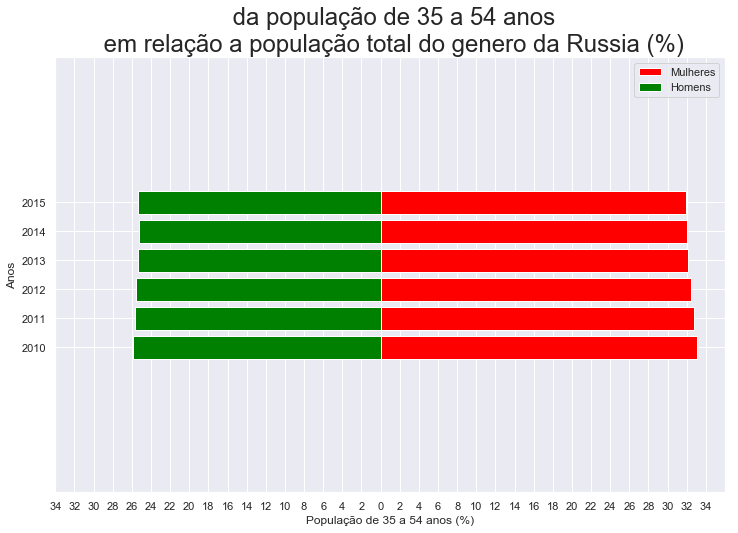

In [56]:
generate_growth_pop_age_barh(russia_age_35_54, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(russia_age_35_54,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(russia_age_35_54,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 35 a 54 anos (%)', 'Anos', [2005,2020], ' da população ' +
                             'de 35 a 54 anos\n em relação a população total do genero da Russia (%)',
                             ['Mulheres','Homens'])

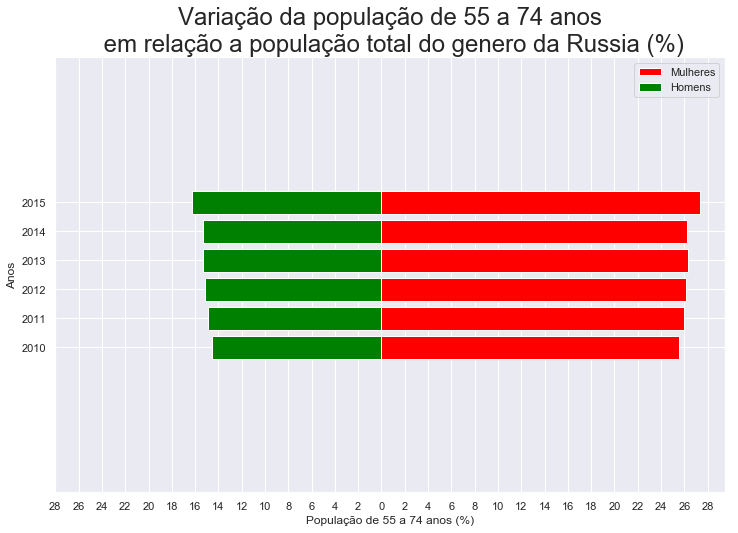

In [57]:
generate_growth_pop_age_barh(russia_age_55_74, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(russia_age_55_74,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(russia_age_55_74,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 55 a 74 anos (%)', 'Anos', [2005,2020], 'Variação da população ' +
                             'de 55 a 74 anos\n em relação a população total do genero da Russia (%)',
                             ['Mulheres','Homens'])

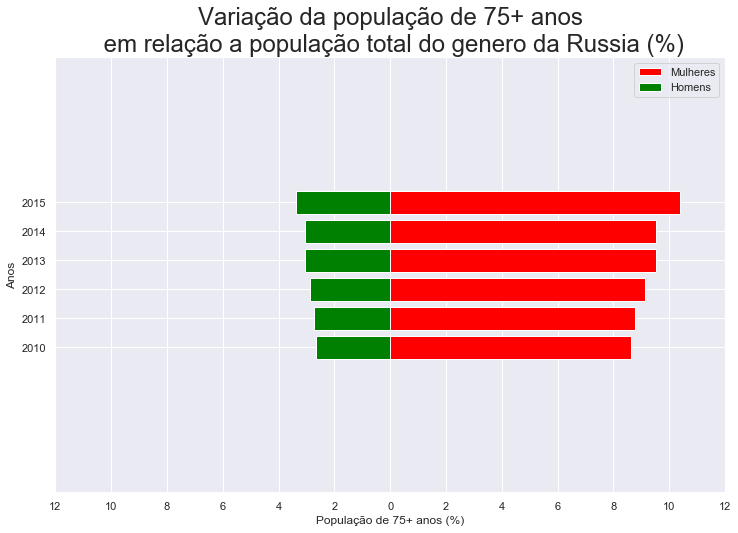

In [58]:
generate_growth_pop_age_barh(russia_age_75, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(russia_age_75,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(russia_age_75,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 75+ anos (%)', 'Anos', [2005,2020], 'Variação da população ' +
                             'de 75+ anos\n em relação a população total do genero da Russia (%)',
                             ['Mulheres','Homens'])

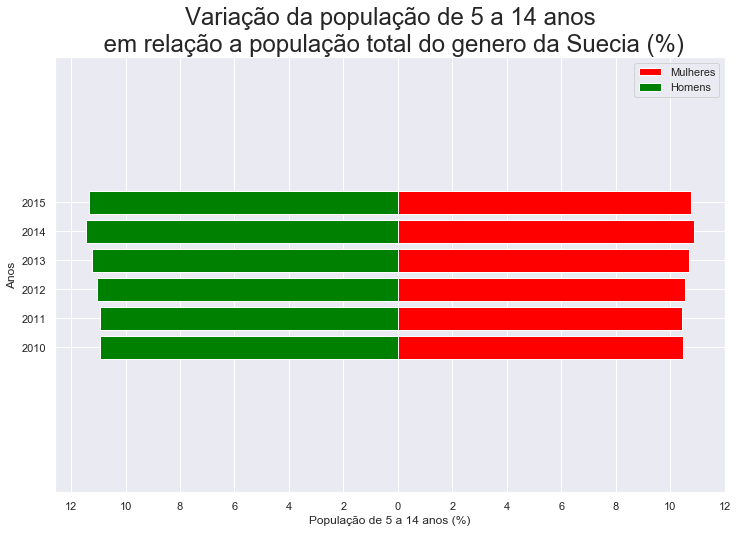

In [59]:
generate_growth_pop_age_barh(sweden_age_5_14, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(sweden_age_5_14,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(sweden_age_5_14,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 5 a 14 anos (%)', 'Anos', [2005,2020], 'Variação da população ' +
                             'de 5 a 14 anos\n em relação a população total do genero da Suecia (%)',
                             ['Mulheres','Homens'])

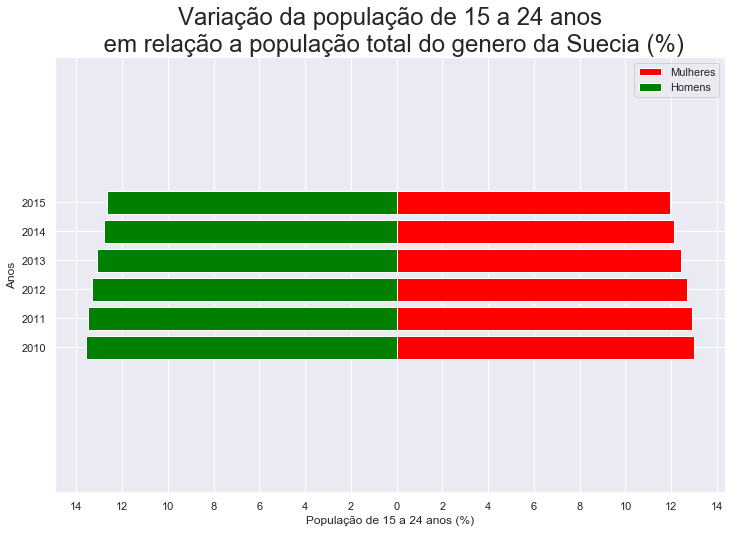

In [60]:
generate_growth_pop_age_barh(sweden_age_15_24, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(sweden_age_15_24,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(sweden_age_15_24,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 15 a 24 anos (%)', 'Anos', [2005,2020], 'Variação da população ' +
                             'de 15 a 24 anos\n em relação a população total do genero da Suecia (%)',
                             ['Mulheres','Homens'])

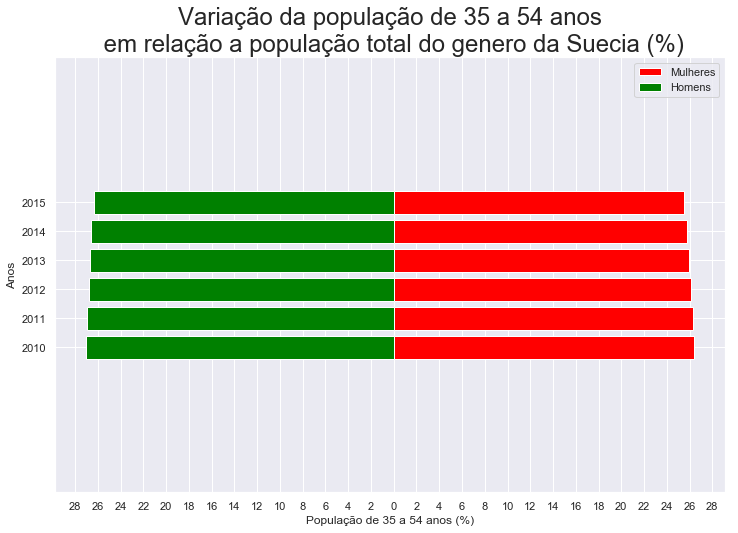

In [61]:
generate_growth_pop_age_barh(sweden_age_35_54, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(sweden_age_35_54,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(sweden_age_35_54,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 35 a 54 anos (%)', 'Anos', [2005,2020], 'Variação da população ' +
                             'de 35 a 54 anos\n em relação a população total do genero da Suecia (%)',
                             ['Mulheres','Homens'])

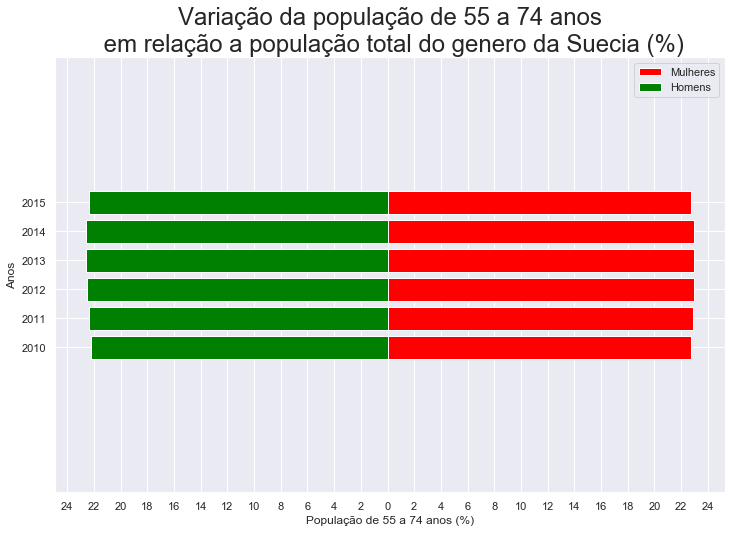

In [62]:
generate_growth_pop_age_barh(sweden_age_55_74, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(sweden_age_55_74,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(sweden_age_55_74,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 55 a 74 anos (%)', 'Anos', [2005,2020], 'Variação da população ' +
                             'de 55 a 74 anos\n em relação a população total do genero da Suecia (%)',
                             ['Mulheres','Homens'])

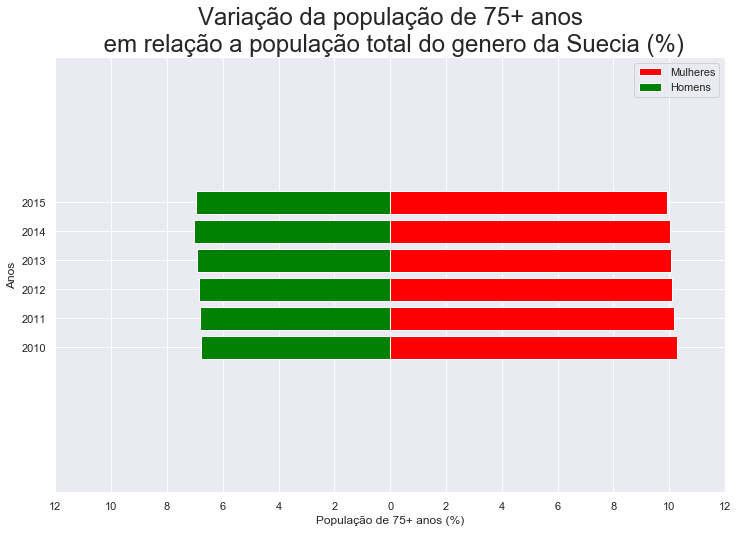

In [63]:
generate_growth_pop_age_barh(sweden_age_75, 'year', 'populationFemaleTaxa', 'populationMaleTaxa', getLabels(sweden_age_75,
                              'populationFemaleTaxa', 'populationMaleTaxa', True), getLabels(sweden_age_75,'populationFemaleTaxa',
                            'populationMaleTaxa'),'População de 75+ anos (%)', 'Anos', [2005,2020], 'Variação da população ' +
                             'de 75+ anos\n em relação a população total do genero da Suecia (%)',
                             ['Mulheres','Homens'])